In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
listings_df = pd.read_csv('./cleaned_datasets/listings_cleaned.csv')
listings_df.dtypes

Unnamed: 0                                     int64
accommodates                                 float64
availability_30                                int64
bathrooms                                    float64
bed_type                                      object
                                              ...   
ev_charger                                     int64
tub_with_shower_bench                          int64
roll-in_shower_with_shower_bench_or_chair      int64
waterfront                                     int64
grab-rails_for_shower_and_toilet               int64
Length: 137, dtype: object

In [3]:
listings_df.city.unique()

array(['Asheville', 'Woodfin', 'Weaverville', 'Candler', 'Arden',
       'Fletcher', 'Mills River', 'austin', 'dripping springs', 'lakeway',
       'bee cave', 'the hills', 'lockhart', 'del valle', 'sunset valley',
       'manchaca', 'san antonio', 'west lake hills', 'portland',
       'rollingwood', 'pflugerville', 'point venture', 'nashville',
       'ashland city', 'antioch', 'madison', 'cane ridge', 'brentwood',
       'pegram', 'archwood acres rio', 'whites creek', 'goodlettsville',
       'berry hill', 'hermitage', 'mount juliet', 'old hickory',
       'New Orleans', 'Arabi', 'ByWater-Marigny, New Orleans',
       'ByWater-Marigny, New Orleans ', 'Slidell', 'New Orleans ',
       'New Orleans, Louisiana, US', '紐奧良', 'Gretna', 'Metairie', 'acton',
       'palmdale', 'los angeles', 'private room near usc', 'agoura hills',
       'monterey park', 'thousand oaks', 'westlake village',
       'santa clarita', 'agua dulce', 'alhambra', 'south pasadena',
       'gardena', 'artesia', 'cas

In [4]:
listings_df.metropolitan.unique()

array(['asheville', 'austin', 'nashville', 'new_orleans', 'LA'],
      dtype=object)

In [5]:
listings_df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [6]:
listings_df.price.quantile(0.95)

600.0

In [7]:
#most are below 600

# Analysis on Top Hosts

In [8]:
#find top hosts:
top_host=listings_df.host_id.value_counts().head(10)
top_host

4962900      121
31148752      93
4641823       80
6855810       59
114353388     58
1710302       57
8167447       50
41183272      49
21940642      49
15864252      45
Name: host_id, dtype: int64

In [9]:
#Top hosts in south USA:
#has 121 

In [10]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

#top_host counts of airbnb rentals
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,4962900,121
1,31148752,93
2,4641823,80
3,6855810,59
4,114353388,58
5,1710302,57
6,8167447,50
7,41183272,49
8,21940642,49
9,15864252,45


[Text(0, 0, '1710302'),
 Text(1, 0, '4641823'),
 Text(2, 0, '4962900'),
 Text(3, 0, '6855810'),
 Text(4, 0, '8167447'),
 Text(5, 0, '15864252'),
 Text(6, 0, '21940642'),
 Text(7, 0, '31148752'),
 Text(8, 0, '41183272'),
 Text(9, 0, '114353388')]

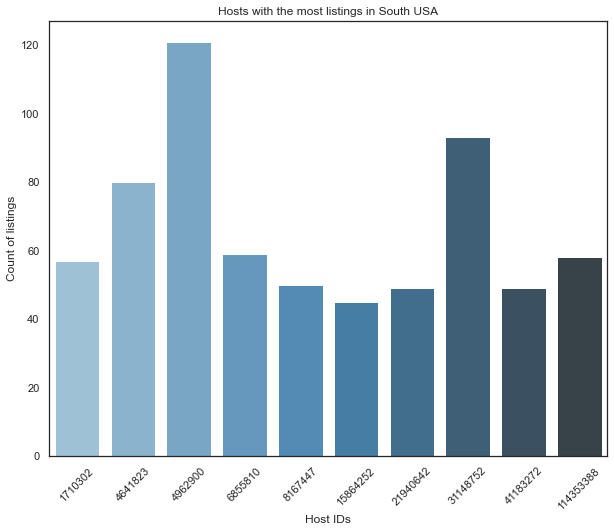

In [11]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in South USA')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [12]:
#There is somewhat uneven distribution among the top 10s 
#10th place is less than half of the 1st place

# Analysis on Metropolitan

In [13]:
all_price_metro = []
for metro in [
    'asheville',
    'austin',
    'nashville',
    'new_orleans',
    'LA'
]:
    metro_price = listings_df[listings_df.metropolitan == metro].price
    metro_info = metro_price.describe(percentiles  = [0.25, 0.5, 0.75])[3:]
    all_price_metro.append(metro_info)

table=pd.DataFrame(all_price_metro)
table.index = [
    'asheville',
    'austin',
    'nashville',
    'new_orleans',
    'LA'
]
table.T

,asheville,austin,nashville,new_orleans,LA
min,16.00,0.0,15.0,0.0,10.0
25%,70.00,89.0,86.0,90.0,69.0
50%,99.00,160.0,130.0,135.0,100.0
75%,149.25,340.0,225.0,220.0,170.0
max,2000.00,10000.0,2600.0,9999.0,10000.0


In [14]:
#looking at price < 600 (outliers)

Text(0.5, 1.0, 'Density and distribution of prices for each metropolitan')

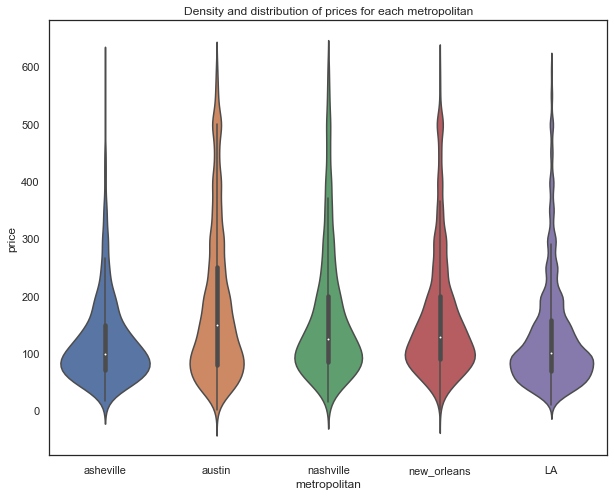

In [15]:
viz_2=sns.violinplot(data=listings_df[listings_df.price < 600], x='metropolitan', y='price')
viz_2.set_title('Density and distribution of prices for each metropolitan')

In [16]:
#generally the medians are very similar while Austin, Nashville, New Orleans have more expensive housing
#Asheville and LA have a wider distribution of cheaper housing (followed by New Orleans and Nashville).
#In terms of Median Ranking goes: Austin, New Orleans, Nashville, LA, Asheville

In [17]:
#housing that's somehow free
listings_df[listings_df.price == 0]

,Unnamed: 0,accommodates,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,host_id,...,disabled_parking_spot,wide_clearance_to_shower_and_toilet,flat_smooth_pathway_to_front_door,beach_essentials,accessible-height_bed,ev_charger,tub_with_shower_bench,roll-in_shower_with_shower_bench_or_chair,waterfront,grab-rails_for_shower_and_toilet
2812,2812,2.0,0,1.0,Real Bed,1.0,1.0,moderate,austin,411693,...,0,0,0,0,0,0,0,0,0,0
18997,18997,8.0,19,2.0,Real Bed,3.0,4.0,strict,New Orleans,80465664,...,0,0,0,0,0,0,0,0,0,0


# City Analysis

In [18]:
#There are lots of cities so let's analyze the top 10
listings_df.city.value_counts().head(10)

los angeles       19515
austin             9566
New Orleans        5288
nashville          3214
hermosa beach      1228
west hollywood     1101
santa monica        993
south pasadena      828
Asheville           763
playa del rey       546
Name: city, dtype: int64

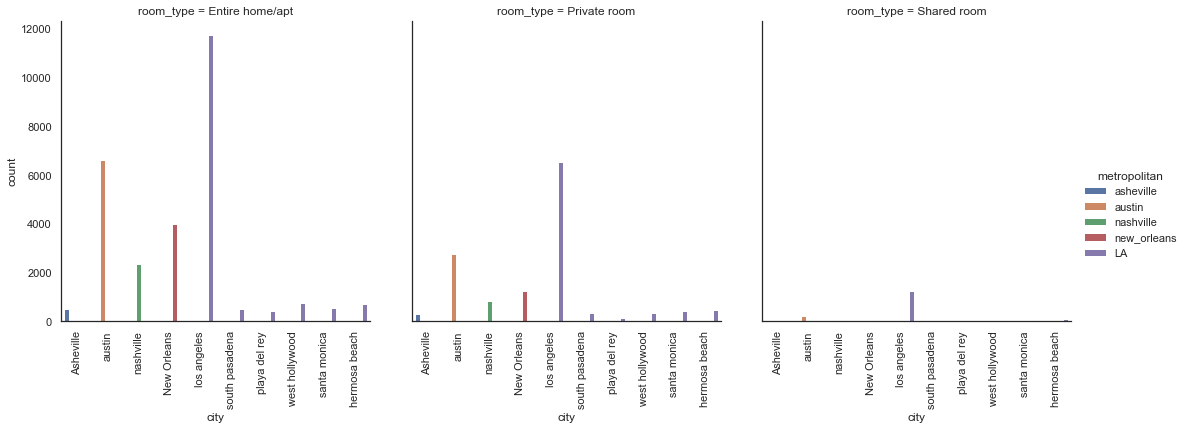

In [19]:
listings_df_popular_city = listings_df[listings_df.city.isin([
    'los angeles', 
    'austin', 
    'New Orleans', 
    'nashville', 
    'hermosa beach', 
    'west hollywood', 
    'santa monica',
    'south pasadena',
    'Asheville',
    'playa del rey'])]

viz_3=sns.catplot(x='city', hue='metropolitan', col='room_type', data=listings_df_popular_city, kind='count')
viz_3.set_xticklabels(rotation=90)

In [20]:
#Entire Home/Apartment:
#most popular: LA, Austin, New Orleans
#Private Room:
#Most popular: LA, Austin, New Orleans
#Shared Room:
#Most popular: LA, Austin

#Austin and LA (and New Orleans) are the most popular.

In [21]:
len(listings_df[listings_df.room_type == 'Shared room'])/len(listings_df)
#there's barely any shared room

0.03889032411915502

# Geographic Analysis

In [22]:
#for plotting on map
print(listings_df[listings_df.price < 600].longitude.min())
print(listings_df[listings_df.price < 600].longitude.max())
print(listings_df[listings_df.price < 600].latitude.min())
print(listings_df[listings_df.price < 600].latitude.max())

-118.91102598739808
-82.41730445018969
29.89826583262301
36.35693014935886


No handles with labels found to put in legend.


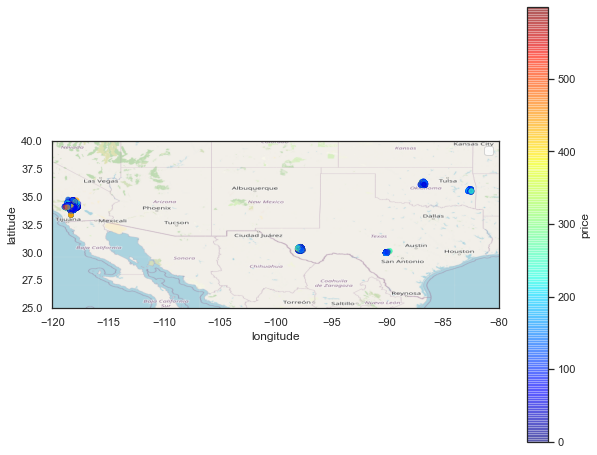

In [23]:
plt.figure(figsize=(10,8))
south_USA=  plt.imread('./images/southUSA.png')
plt.imshow(south_USA,zorder=0,extent= [-120, -80, 25, 40])
ax = plt.gca()
ax.scatter(listings_df[listings_df.price < 600].longitude, listings_df[listings_df.price < 600].latitude, zorder=1, alpha= 0.2, s=10, cmap=plt.get_cmap('jet'))
listings_df[listings_df.price < 600].plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

In [24]:
#Not very useful.
#Let's do for each metropolitan area

In [25]:
for metro in listings_df.metropolitan.unique():
    print(metro)
    metro_temp = listings_df[listings_df.metropolitan == metro]
    print(metro_temp.longitude.min())
    print(metro_temp.longitude.max())
    print(metro_temp.latitude.min())
    print(metro_temp.latitude.max())
    

asheville
-82.77013109087184
-82.41730445018969
35.40740034257261
35.68555826321574
austin
-98.05355280750835
-97.5606217543175
30.11488211103231
30.506687918407177
nashville
-87.0349826422859
-86.5464573530145
35.99972575514116
36.36659263220601
new_orleans
-90.13590208867979
-89.75333791955971
29.89826583262301
30.138585757541552
LA
-118.91102598739808
-117.6554707816984
33.33890467150096
34.74208827963189


No handles with labels found to put in legend.


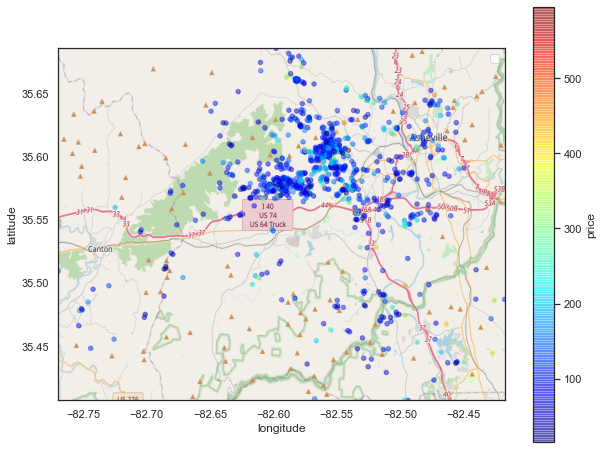

In [26]:
plt.figure(figsize=(10,8))
asheville=  plt.imread('./images/asheville.png')
plt.imshow(asheville,zorder=0,extent= [-82.77013109087184, -82.41730445018969, 35.40740034257261, 35.68555826321574])
ax = plt.gca()
ashe = listings_df[listings_df.metropolitan == 'asheville']
ashe = ashe[ashe.price < 600]
ax.scatter(ashe.longitude, ashe.latitude, zorder=1, alpha= 0.2, s=10, cmap=plt.get_cmap('jet'))
ashe.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

No handles with labels found to put in legend.


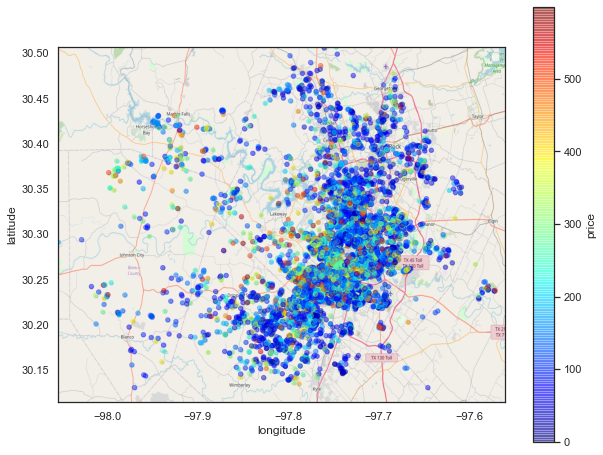

In [27]:
plt.figure(figsize=(10,8))
austin=  plt.imread('./images/austin.png')
plt.imshow(austin,zorder=0,extent= [-98.05355280750835,
-97.5606217543175,
30.11488211103231,
30.506687918407177])
ax = plt.gca()
austin = listings_df[listings_df.metropolitan == 'austin']
austin = austin[austin.price < 600]
ax.scatter(austin.longitude, austin.latitude, zorder=1, alpha= 0.2, s=10, cmap=plt.get_cmap('jet'))
austin.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

No handles with labels found to put in legend.


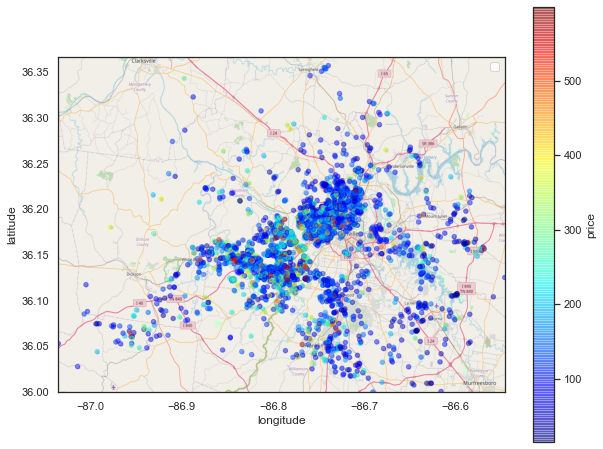

In [28]:
plt.figure(figsize=(10,8))
nashville=  plt.imread('./images/nashville.png')
plt.imshow(nashville,zorder=0,extent= [-87.0349826422859,
-86.5464573530145,
35.99972575514116,
36.36659263220601])
ax = plt.gca()
nashville = listings_df[listings_df.metropolitan == 'nashville']
nashville = nashville[nashville.price < 600]
ax.scatter(nashville.longitude, nashville.latitude, zorder=1, alpha= 0.2, s=10, cmap=plt.get_cmap('jet'))
nashville.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

No handles with labels found to put in legend.


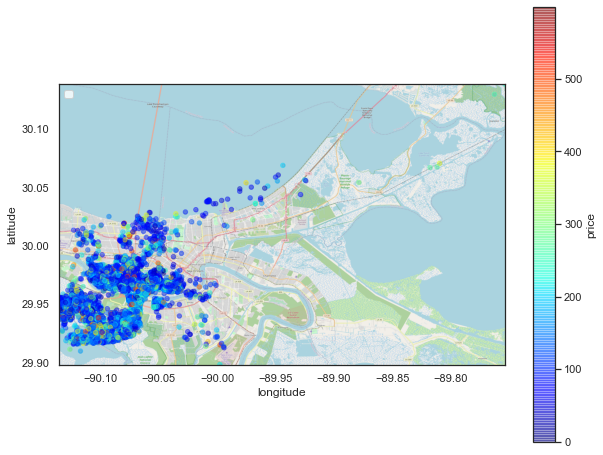

In [29]:
plt.figure(figsize=(10,8))
new_orleans = plt.imread('./images/new_orleans.png')
plt.imshow(new_orleans,zorder=0,extent= [
-90.13590208867979,
-89.75333791955971,
29.89826583262301,
30.138585757541552])
ax = plt.gca()
new_orleans = listings_df[listings_df.metropolitan == 'new_orleans']
new_orleans = new_orleans[new_orleans.price < 600]
ax.scatter(new_orleans.longitude, new_orleans.latitude, zorder=1, alpha= 0.2, s=10, cmap=plt.get_cmap('jet'))
new_orleans.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

No handles with labels found to put in legend.


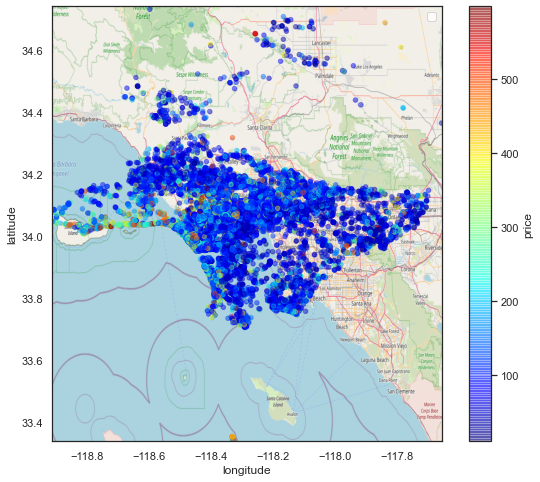

In [30]:
plt.figure(figsize=(10,8))
la = plt.imread('./images/la.png')
plt.imshow(la,zorder=0,extent= [
-118.91102598739808,
-117.6554707816984,
33.33890467150096,
34.74208827963189])
ax = plt.gca()
la = listings_df[listings_df.metropolitan == 'LA']
la = la[la.price < 600]
ax.scatter(la.longitude, la.latitude, zorder=1, alpha= 0.2, s=10, cmap=plt.get_cmap('jet'))
la.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
plt.legend()
plt.show()

# Name Analysis

In [31]:
names_lst =[]
#getting name strings from the column and appending it to the list
for name in listings_df.name:
    names_lst.append(name)
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl
#initializing empty list where we are going to have words counted
names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in names_lst:
    for word in split_name(x):
        word=word.lower()
        names_for_count_.append(word)

In [32]:
from collections import Counter
#let's see top 25 used words by host to name their listing
top_words =Counter(names_for_count_).most_common()
top_50_words =top_words[0:50]

In [33]:
#now let's put our findings in dataframe for further visualizations
top_50_words_df=pd.DataFrame(top_50_words)
top_50_words_df.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'in'),
 Text(1, 0, 'private'),
 Text(2, 0, 'room'),
 Text(3, 0, 'home'),
 Text(4, 0, 'the'),
 Text(5, 0, 'to'),
 Text(6, 0, 'house'),
 Text(7, 0, 'bedroom'),
 Text(8, 0, 'cozy'),
 Text(9, 0, 'hollywood'),
 Text(10, 0, '&'),
 Text(11, 0, 'downtown'),
 Text(12, 0, 'with'),
 Text(13, 0, 'apartment'),
 Text(14, 0, '-'),
 Text(15, 0, 'near'),
 Text(16, 0, 'beach'),
 Text(17, 0, 'studio'),
 Text(18, 0, 'of'),
 Text(19, 0, 'and'),
 Text(20, 0, '2'),
 Text(21, 0, 'modern'),
 Text(22, 0, 'austin'),
 Text(23, 0, '1'),
 Text(24, 0, 'luxury'),
 Text(25, 0, 'beautiful'),
 Text(26, 0, 'spacious'),
 Text(27, 0, 'la'),
 Text(28, 0, 'from'),
 Text(29, 0, 'charming'),
 Text(30, 0, 'for'),
 Text(31, 0, 'bath'),
 Text(32, 0, 'heart'),
 Text(33, 0, 'apt'),
 Text(34, 0, 'hills'),
 Text(35, 0, 'venice'),
 Text(36, 0, 'east'),
 Text(37, 0, 'a'),
 Text(38, 0, 'new'),
 Text(39, 0, 'bed'),
 Text(40, 0, 'condo'),
 Text(41, 0, 'bungalow'),
 Text(42, 0, 'west'),
 Text(43, 0, 'guest'),
 Text(44, 0, 'on')

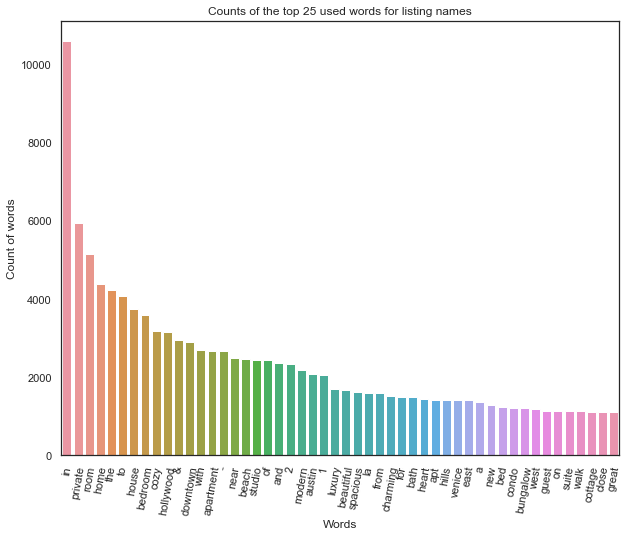

In [34]:
#we are going to use barplot for this visualization
viz_5=sns.barplot(x='Words', y='Count', data=top_50_words_df)
viz_5.set_title('Counts of the top 25 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

# room type

In [35]:
room_data = []
for room_type in np.unique(listings_df.room_type):
    room = listings_df[listings_df.room_type == room_type]
    room_data.append([room.price.mean(), room.price.median(), len(room)/len(listings_df) *100])
room_df = pd.DataFrame(room_data)
room_df.index = np.unique(listings_df.room_type)
room_df.columns = ['mean price', 'median price', 'proportion']

In [36]:
room_df

,mean price,median price,proportion
Entire home/apt,271.775154,159.0,62.769023
Private room,93.054178,70.0,33.341945
Shared room,60.968319,35.0,3.889032


# Price Distribution

<AxesSubplot:ylabel='Frequency'>

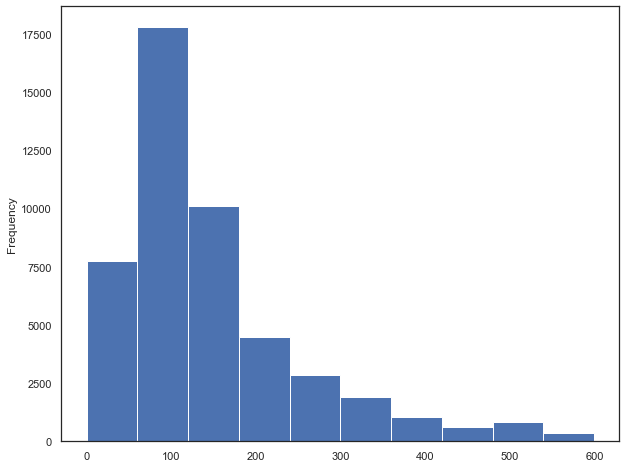

In [37]:
listings_df[listings_df.price < 600].price.plot.hist()

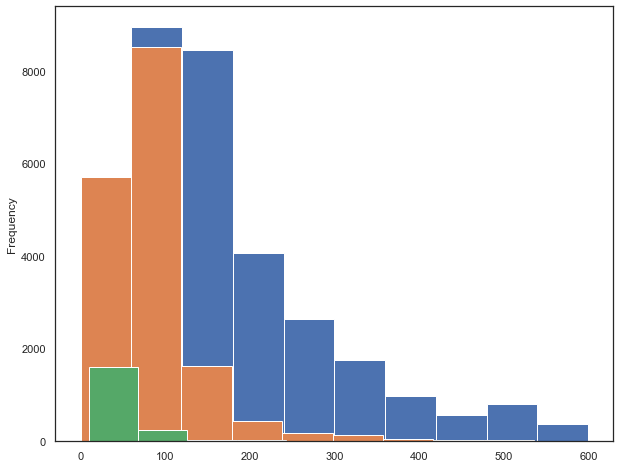

In [38]:
for room_type in np.unique(listings_df.room_type):
    room = listings_df[listings_df.room_type == room_type]
    room[room.price < 600].price.plot.hist()

In [39]:
for column in listings_df.columns:
    print(column)

Unnamed: 0
accommodates
availability_30
bathrooms
bed_type
bedrooms
beds
cancellation_policy
city
host_id
id
instant_bookable
latitude
longitude
metropolitan
name
price
property_type
review_scores_checkin
review_scores_cleanliness
review_scores_communication
review_scores_location
review_scores_rating
review_scores_value
room_type
state
weekly_price
zipcode
Unnamed: 28
air_conditioning
breakfast
cable_tv
carbon_monoxide_detector
elevator_in_building
essentials
family/kid_friendly
fire_extinguisher
first_aid_kit
free_parking_on_premises
gym
hangers
heating
indoor_fireplace
internet
kitchen
lock_on_bedroom_door
pets_allowed
pets_live_on_this_property
pool
self_check-in
shampoo
smoke_detector
smoking_allowed
suitable_for_events
translation_missing:_en.hosting_amenity_49
translation_missing:_en.hosting_amenity_50
tv
wheelchair_accessible
wireless_internet
buzzer/wireless_intercom
cat(s)
dog(s)
doorman_entry
dryer
hair_dryer
hot_tub
keypad
lockbox
safety_card
washer
24-hour_check-in
doorman

In [40]:
listings_df = listings_df.drop(['Unnamed: 0', 'Unnamed: 28'],axis=1)

# Feature Engineering

In [41]:
listings_ml_df = listings_df
#throwing away unnecessary columns
listings_ml_df = listings_ml_df.drop([
    'host_id',
    'id',
    'name',
    'zipcode',
    'state',
], axis=1)

In [42]:
bed_type_encode = pd.get_dummies(listings_ml_df.bed_type)
cp_encode = pd.get_dummies(listings_ml_df.cancellation_policy)
listings_ml_df.instant_bookable[listings_ml_df.instant_bookable == 'f'] = 0
listings_ml_df.instant_bookable[listings_ml_df.instant_bookable == 't'] = 1
metro_encode = pd.get_dummies(listings_ml_df.metropolitan)
property_encode = pd.get_dummies(listings_ml_df.property_type)
room_encode = pd.get_dummies(listings_ml_df.room_type)

<ipython-input-42-af2e7cfd8c8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_ml_df.instant_bookable[listings_ml_df.instant_bookable == 'f'] = 0
<ipython-input-42-af2e7cfd8c8a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_ml_df.instant_bookable[listings_ml_df.instant_bookable == 't'] = 1


In [43]:
listings_ml_df = listings_ml_df.drop([
    'bed_type', 
    'cancellation_policy',
    'city',
    'instant_bookable',
    'metropolitan',
    'property_type',
    'room_type',
    'weekly_price'
                    ], axis=1)

listings_ml_df = pd.concat([
    listings_ml_df,
    bed_type_encode,
    cp_encode,
    metro_encode,
    property_encode,
    room_encode], axis=1)

In [44]:
listings_ml_df

,accommodates,availability_30,bathrooms,bedrooms,beds,latitude,longitude,price,review_scores_checkin,review_scores_cleanliness,...,Tipi,Townhouse,Train,Treehouse,Vacation home,Villa,Yurt,Entire home/apt,Private room,Shared room
0,2.0,0,1.0,1.0,1.0,35.590784,-82.591466,105.0,10.0,9.0,...,0,0,0,0,0,0,0,1,0,0
1,4.0,17,1.0,1.0,2.0,35.584968,-82.632199,125.0,10.0,10.0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,29,1.0,1.0,1.0,35.626600,-82.637618,45.0,10.0,10.0,...,0,0,0,0,0,0,0,0,1,0
3,6.0,28,2.5,1.0,6.0,35.579159,-82.596392,24.0,10.0,10.0,...,0,0,0,0,0,0,0,0,0,1
4,6.0,25,2.5,1.0,6.0,35.577755,-82.594996,24.0,10.0,9.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50316,2.0,29,1.0,1.0,1.0,33.930022,-117.974940,75.0,10.0,10.0,...,0,0,0,0,0,0,0,0,1,0
50317,2.0,29,1.0,1.0,1.0,34.037906,-118.654012,205.0,10.0,10.0,...,0,0,0,0,0,0,0,0,1,0
50318,10.0,29,5.0,5.0,5.0,34.036676,-118.650505,500.0,10.0,10.0,...,0,0,0,0,0,1,0,1,0,0
50319,4.0,28,1.0,2.0,2.0,33.944261,-117.927134,65.0,10.0,10.0,...,0,0,0,0,0,0,0,0,1,0


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(listings_ml_df.drop(['price'], axis=1), listings_ml_df.price)

In [47]:
rf = RandomForestRegressor(random_state=0, verbose=2)
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomForestRegressor(random_state=0, verbose=2)

In [48]:
print(rf.score(X_train, y_train))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


0.9220934969458752


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


In [49]:
print(rf.score(X_test, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


0.463103690369552


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [50]:
print(rf.feature_importances_)

[3.95426351e-02 3.70763991e-02 2.47390074e-01 9.57449647e-02
 1.59943335e-02 7.32489576e-02 1.29067815e-01 2.06509291e-03
 2.23608177e-03 6.26455356e-04 2.09031913e-03 1.28321335e-02
 3.80618162e-03 4.32279512e-03 4.00021519e-03 7.76182826e-03
 4.16078010e-03 7.70175740e-03 5.38880014e-03 4.64526907e-03
 1.15366113e-02 3.50287581e-03 9.66459597e-03 3.62379270e-03
 6.06725609e-03 2.94122427e-02 7.10836017e-03 5.26521489e-03
 1.96521908e-03 7.26419170e-03 5.02293128e-03 1.41252437e-03
 1.64323517e-02 4.50725833e-04 4.75957646e-03 6.85169148e-03
 5.48162192e-03 8.80709958e-03 2.92416137e-03 2.79119463e-03
 3.85609222e-03 2.93599788e-03 4.27639251e-03 2.95153463e-03
 4.40316703e-04 2.06351834e-03 4.48989846e-05 5.19127850e-03
 2.78713161e-03 7.13682296e-03 5.26700584e-04 3.71322814e-04
 2.32479466e-03 9.13803558e-03 3.65018533e-03 1.26933625e-03
 1.52741749e-04 4.45713198e-03 3.62248402e-05 4.92811357e-03
 1.83080310e-03 2.17666315e-04 1.09585714e-04 3.62310793e-04
 2.70462489e-03 1.363907

Text(0, 0.5, 'Mean decrease in impurity')

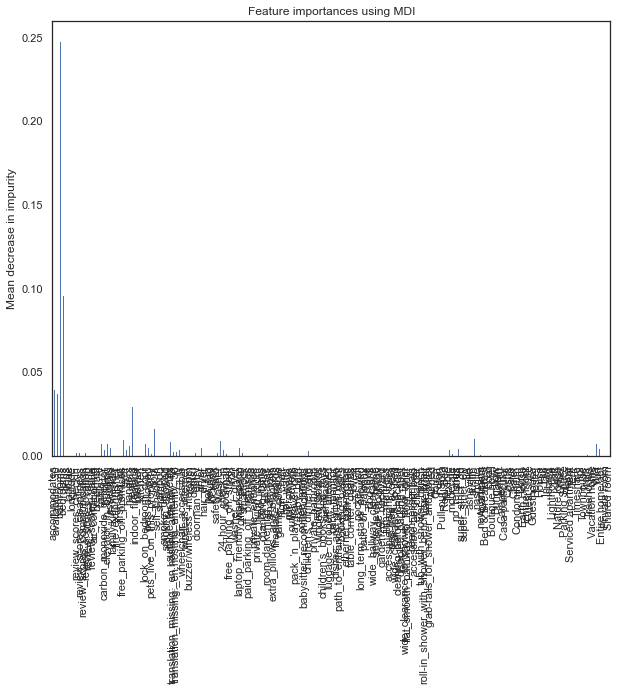

In [55]:
forest_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

In [65]:
for ii in range(len(X_train.columns)):
    if rf.feature_importances_[ii] > 0.01:
        print(X_train.columns[ii])
        print(rf.feature_importances_[ii])

accommodates
0.0395426350636358
availability_30
0.037076399124724005
bathrooms
0.24739007422695625
bedrooms
0.09574496465563731
beds
0.01599433351351511
latitude
0.07324895760535707
longitude
0.12906781518281593
review_scores_rating
0.01283213354950926
fire_extinguisher
0.011536611305131027
heating
0.029412242729875703
pool
0.016432351703461485
super_strict_60
0.011729834044072096
austin
0.01053974728500453
Entire home/apt
0.013805202224950302


In [67]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = listings_ml_df.drop(['price'], axis=1).dtypes == int

mi_scores = make_mi_scores(listings_ml_df.drop(['price'], axis=1), listings_ml_df.price, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

accommodates                        0.328216
beds                                0.239813
longitude                           0.193294
family/kid_friendly                 0.049956
review_scores_rating                0.041352
Apartment                           0.035352
LA                                  0.030347
dryer                               0.027043
24-hour_check-in                    0.023273
free_parking_on_premises            0.018916
laptop_friendly_workspace           0.017296
heating                             0.016078
kitchen                             0.014217
lock_on_bedroom_door                0.012557
private_entrance                    0.011634
Real Bed                            0.010494
hangers                             0.009877
pets_allowed                        0.009250
new_orleans                         0.007930
Boutique hotel                      0.007296
review_scores_checkin               0.007133
disabled_parking_spot               0.006775
safety_car

In [71]:
print(mi_scores[mi_scores > 0.01])

accommodates                                  0.328216
bedrooms                                      0.316665
Entire home/apt                               0.260067
beds                                          0.239813
bathrooms                                     0.234017
Private room                                  0.195739
longitude                                     0.193294
latitude                                      0.169843
Shared room                                   0.067737
family/kid_friendly                           0.049956
tv                                            0.048082
cable_tv                                      0.042219
review_scores_rating                          0.041352
translation_missing:_en.hosting_amenity_49    0.040966
House                                         0.035466
Apartment                                     0.035352
translation_missing:_en.hosting_amenity_50    0.034531
availability_30                               0.030809
LA        